In [1]:
#RESTAURAUNT VISITOR DATASET

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [9]:
rv = pd.read_csv(r"C:\Users\a980mzz\Downloads\imarticus\RestaurantVisitors.csv",index_col= 'date',parse_dates=True)

In [10]:
rv = rv.dropna()

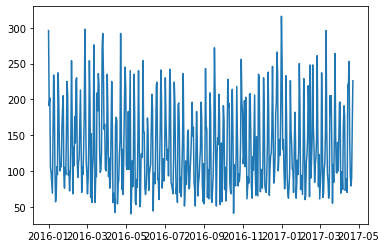

In [11]:
plt.plot(rv.total)

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
import statsmodels.api as sm

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
index_pos =rv[rv.holiday==1].index
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [16]:
dec_val = seasonal_decompose(rv.total)

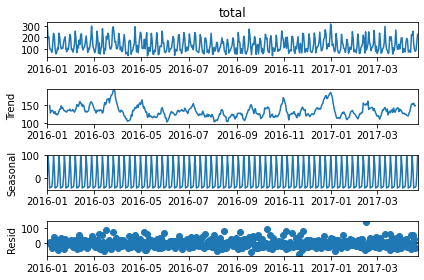

In [17]:
dec_val.plot();

In [18]:
train_rv = rv.iloc[0:450]
test_rv = rv.iloc[450:479]

In [19]:
import pmdarima

In [20]:
from pmdarima import auto_arima

In [21]:
auto_arima(rv['total'],seasonal=True,m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [22]:
model1=SARIMAX(train_rv['total'],order=(0,0,0),seasonal_order=(1, 0, 1, 7))

C:\Users\a980mzz\ANAconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\a980mzz\ANAconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
results=model1.fit()

In [24]:
pred_rv=results.predict(start=450, end=477)
pred_rv

2017-03-26    174.192749
2017-03-27     90.608599
2017-03-28     95.758593
2017-03-29     95.479749
2017-03-30     96.690128
2017-03-31    145.286356
2017-04-01    232.772179
2017-04-02    174.181811
2017-04-03     90.602910
2017-04-04     95.752580
2017-04-05     95.473754
2017-04-06     96.684057
2017-04-07    145.277234
2017-04-08    232.757563
2017-04-09    174.170874
2017-04-10     90.597220
2017-04-11     95.746568
2017-04-12     95.467759
2017-04-13     96.677986
2017-04-14    145.268111
2017-04-15    232.742947
2017-04-16    174.159937
2017-04-17     90.591532
2017-04-18     95.740556
2017-04-19     95.461764
2017-04-20     96.671915
2017-04-21    145.258990
2017-04-22    232.728333
Freq: D, Name: predicted_mean, dtype: float64

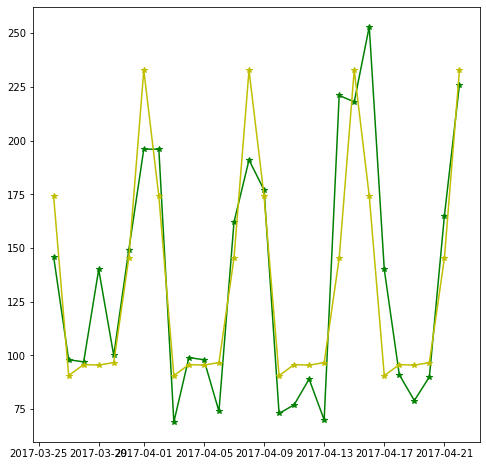

In [25]:
plt.figure(figsize=(8,8))
plt.plot(test_rv.total,marker="*",color='g',label='Actual')
plt.plot(pred_rv,marker="*",color='y',label='Prrd')

In [26]:
error=test_rv.total-pred_rv

In [27]:
auto_arima(rv['total'],seasonal=True,m=7,exogenous=rv[['holiday']],maxiter=75)

ARIMA(maxiter=75, order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [28]:
model2=SARIMAX(train_rv['total'],order=(1,0,0),seasonal_order=(1, 0, 1, 7),exog=train_rv[['holiday']])

C:\Users\a980mzz\ANAconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\a980mzz\ANAconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
results2=model2.fit()

In [30]:
pred_sarimax=results2.predict(start=450,end=477,exog=test_rv[['holiday']])
pred_sarimax

2017-03-26    176.353715
2017-03-27     81.861069
2017-03-28     93.017528
2017-03-29     95.451719
2017-03-30     92.486937
2017-03-31    138.964426
2017-04-01    228.768392
2017-04-02    169.411943
2017-04-03     80.492000
2017-04-04     92.743595
2017-04-05     95.393325
2017-04-06     92.471167
2017-04-07    138.954315
2017-04-08    228.754715
2017-04-09    169.402034
2017-04-10     80.487314
2017-04-11     92.738211
2017-04-12     95.387789
2017-04-13     92.465802
2017-04-14    207.887652
2017-04-15    228.741442
2017-04-16    238.333604
2017-04-17    149.424044
2017-04-18     92.732830
2017-04-19     95.382255
2017-04-20     92.460436
2017-04-21    138.938190
2017-04-22    228.728169
Freq: D, Name: predicted_mean, dtype: float64

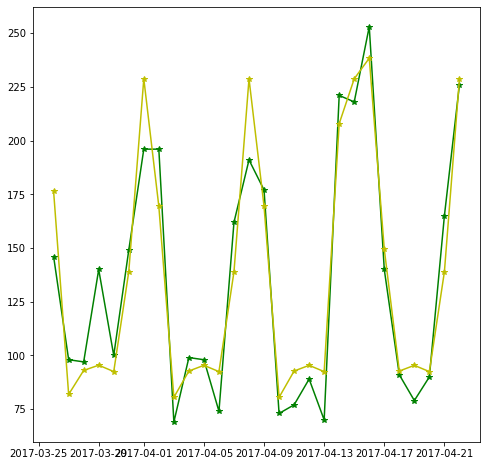

In [31]:
plt.figure(figsize=(8,8))
plt.plot(test_rv.total,marker="*",color='g',label='Actual')
plt.plot(pred_sarimax,marker="*",color='y',label='Prrd')

In [ ]:
# based on the above we are able to forecast the count of customers coming in and plan stock and inventory accordingly

In [ ]:
# below we are using NLP to see the review of the customer feedback for improvement

In [32]:
import nltk
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [57]:
nb_model = MultinomialNB()

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
trip=pd.read_csv(r"C:\Users\a980mzz\Downloads\Trip_advisor_review.csv")

In [36]:
sent = SentimentIntensityAnalyzer()

In [42]:
score_blob=[]
for comment in trip['Review']:
    var2=TextBlob(comment)
    score_blob.append(var2.sentiment[0])

In [43]:
trip['score_blob']=score_blob

In [44]:
from textblob import TextBlob

In [45]:
trip.Review=trip.Review.str.lower()

In [49]:
stopwords.words('english')
abcd=stopwords.words('english')

In [50]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in abcd]

In [51]:
trip.Review.apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [52]:
bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(trip["Review"])

In [53]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [54]:
tdm = bow_transformer.transform(trip["Review"])

In [55]:
x_train, x_test , y_train, y_test = train_test_split(tdm ,  trip.Rating , test_size= .2)

In [58]:
nb_model.fit(x_train,y_train)

MultinomialNB()

In [59]:
pred = nb_model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
tab = confusion_matrix(y_test, pred)
tab

array([[  93,   97,   11,   75,   20],
       [  15,   74,   10,  203,   62],
       [   6,   16,   18,  290,   87],
       [   0,    7,    5,  557,  633],
       [   1,    3,    2,  251, 1563]], dtype=int64)

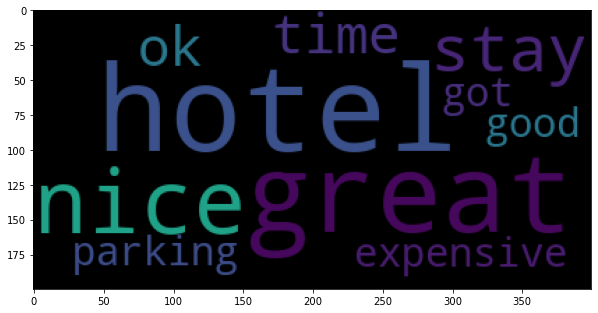

In [63]:
from wordcloud import WordCloud  

# messages["message"]
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 10).generate(str(trip["Review"]) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

In [ ]:
# based on the review from the customers we can see the mostly used words in the above plot.